In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [123]:
bigmart_dataframe = pd.read_csv("/Users/pouniq/Downloads/Data/datasets/project/bigmart_sales_data/code/Train.csv")
bigmart_test = pd.read_csv("/Users/pouniq/Downloads/Data/datasets/project/bigmart_sales_data/bigmart-sales/bigmart_sales_data/data/Test.csv")
df_test = bigmart_test
df = bigmart_dataframe.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#missing values(mean / mode)

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

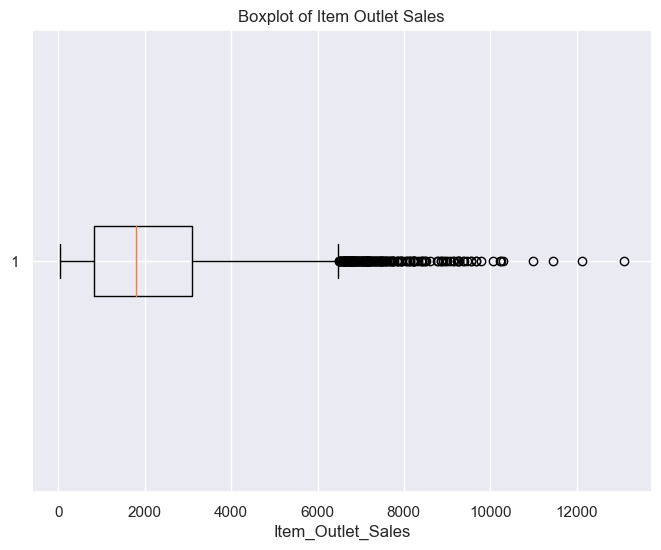

In [124]:
data = df['Item_Outlet_Sales']
plt.figure(figsize=(8, 6)) 
plt.boxplot(data, vert=False) 
plt.xlabel('Item_Outlet_Sales')  
plt.title('Boxplot of Item Outlet Sales')  
plt.show()

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
فیچر های عددی

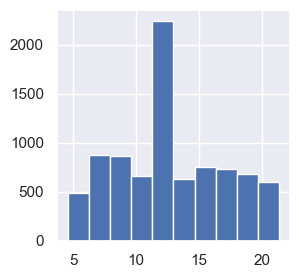

In [37]:
#item weight dis 
plt.figure(figsize=(3,3))
plt.hist(df["Item_Weight"]);
plt.show()


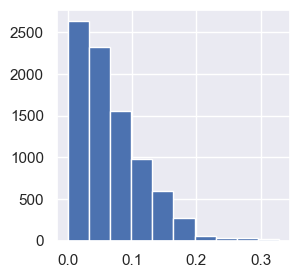

In [35]:
#Item_Visibility
plt.figure(figsize=(3,3))
plt.hist(df["Item_Visibility"]);
plt.show()

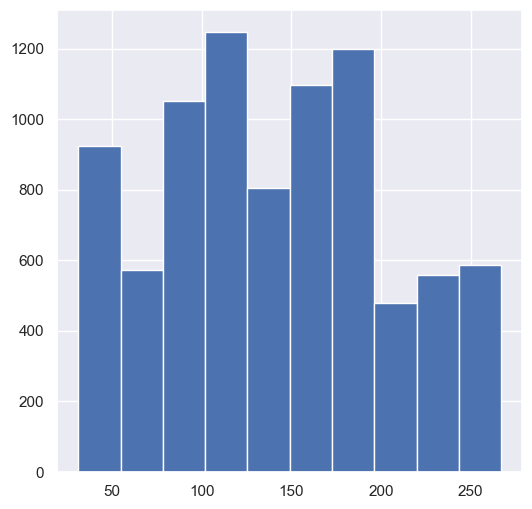

In [40]:
#Item_MRP  
plt.figure(figsize=(6,6))
plt.hist(df["Item_MRP"]);
plt.show()

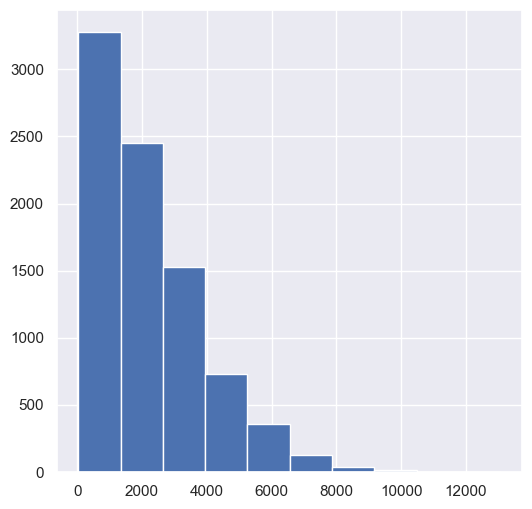

In [42]:
#Item_Outlet_Sales  
plt.figure(figsize=(6,6))
plt.hist(df["Item_Outlet_Sales"]);
plt.show()

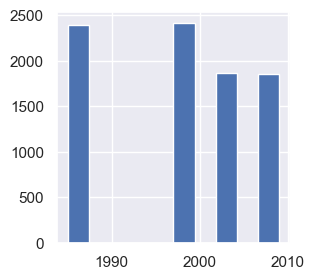

In [44]:
plt.figure(figsize=(3,3 ))
plt.hist(df["Outlet_Establishment_Year"]);
plt.show()

فیچرهای کاتگوریکال

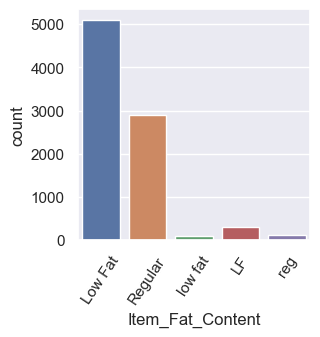

In [73]:
plt.figure(figsize=(3,3))
sns.countplot(x = "Item_Fat_Content",data = df);
plt.xticks(rotation=56)
plt.show()

low fat = LF
Regular = reg
so we should clean this data and put the two columns into one column.

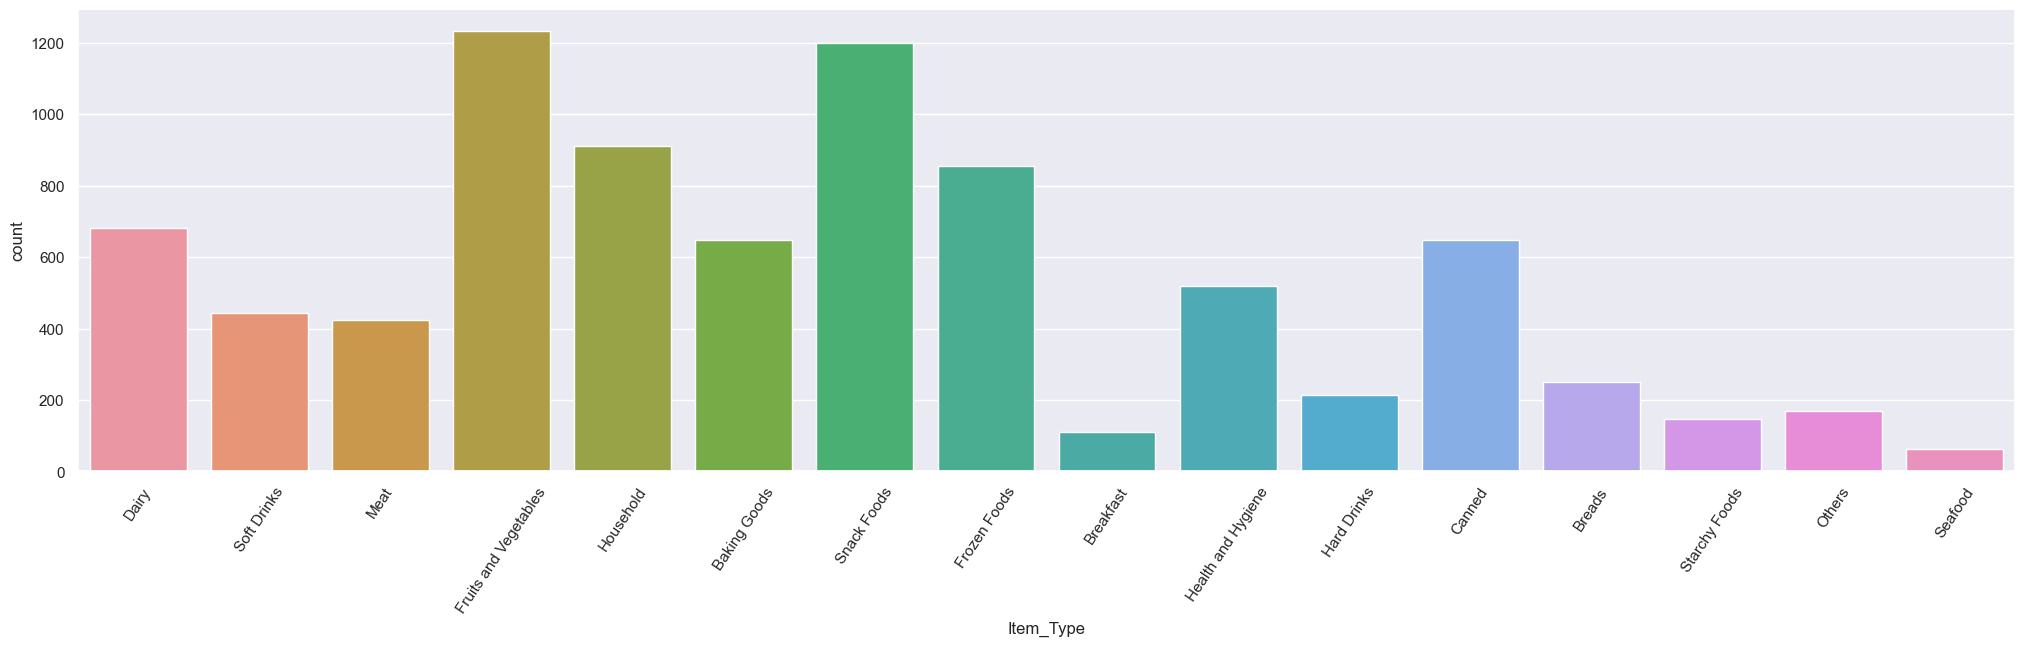

In [74]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Item_Type",data = df);
plt.xticks(rotation=56)
plt.show()

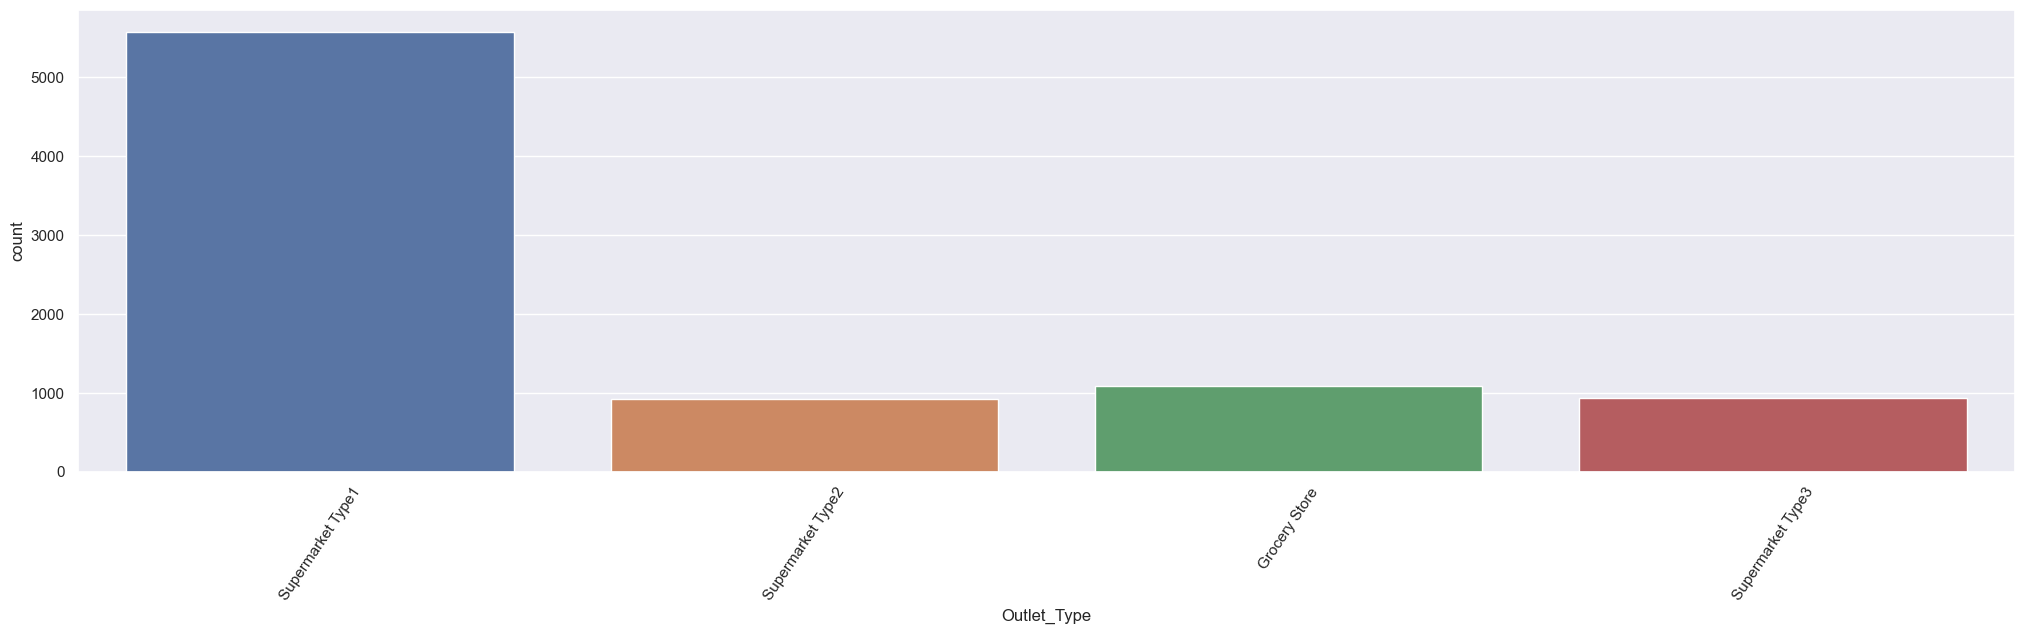

In [75]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Outlet_Type",data = df);
plt.xticks(rotation=56)
plt.show()

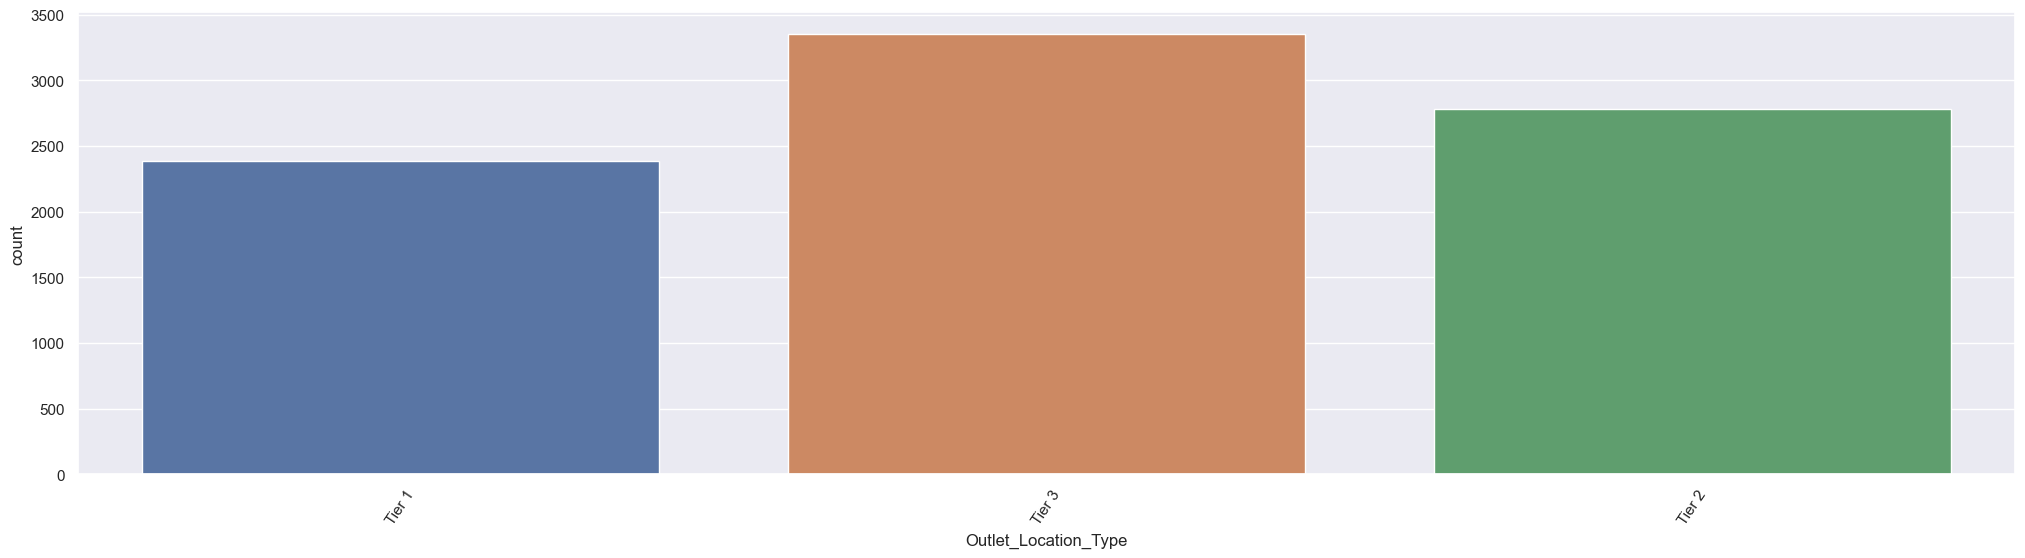

In [79]:
plt.figure(figsize=(25,6))
sns.countplot(x = "Outlet_Location_Type",data = df);
plt.xticks(rotation=56)
plt.show()

data preprocessing
=> cat -----> numrical
=>  

In [89]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [87]:
df.replace({"Item_Fat_Content": {"low fat":"Low Fat","reg":"Regular","LF":"Low Fat"}},inplace = True)


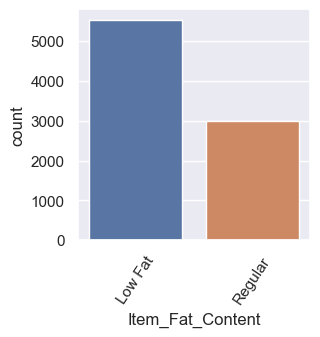

In [88]:
plt.figure(figsize=(3,3))
sns.countplot(x = "Item_Fat_Content",data = df);
plt.xticks(rotation=56)
plt.show()

In [90]:
##encoding

In [91]:
enc = LabelEncoder()

In [108]:
df["Item_Identifier"] = enc.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"] = enc.fit_transform(df["Item_Fat_Content"])
df["Item_Type"] = enc.fit_transform(df["Item_Type"])
df["Outlet_Identifier"] = enc.fit_transform(df["Outlet_Identifier"])
df["Outlet_Size"] = enc.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = enc.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"] = enc.fit_transform(df["Outlet_Type"])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [119]:
x = df.drop("Item_Outlet_Sales",axis=1)
y = df["Item_Outlet_Sales"]

In [138]:
x_train , x_test , y_train , y_test =  train_test_split(x , y , test_size = 0.3 ,  random_state = 2  )

In [139]:
print(x.shape ,  x_train.shape , x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [140]:
reg = XGBRegressor()

In [141]:
 reg.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
pred = reg.predict(x_train)

In [144]:
r2 = metrics.r2_score(y_train , pred) 

In [147]:
print(f"evaluted prediction = {r2}")

evaluted prediction = 0.8879480674665767


In [148]:
pred = reg.predict(x_test)

In [151]:
r2_t = metrics.r2_score(y_test , pred) 

In [152]:
print(f"evaluted prediction = {r2_t}")

evaluted prediction = 0.5275917862774535
